# MATH 210 Introduction to Mathematical Computing

## March 23, 2018

1. Higher order differential equations
2. Solving first order systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Higher order differential equations

Most numerical methods for solving differential are setup for first order equations and systems. So what do we do to solve a higher order equation? We re-write it as a first order system by introducing new variables.

Consider $y'' + y = 0$. This is a second order equation. Let's re-write this as a first order system by introducing variables $u_0 = y$ and $u_1 = y'$. Notice that $u_0' = y' = u_1$ and $u_1' = y'' = -y = -u_0$ since our equation is $y'' = - y$. Then we have

$$
\mathbf{u}'
=
\begin{bmatrix} u'_0 \\ u'_1 \end{bmatrix}
=
\begin{bmatrix} u_1 \\ -u_0 \end{bmatrix}
=
\mathbf{f}(t,\mathbf{u})
$$

Let's try another. Let's transform a second order system into a first order system. Consider

$$
\begin{align*}
x'' &= -\frac{x}{\sqrt{x^2 + y^2}} \\
y'' &= -\frac{y}{\sqrt{x^2 + y^2}} \\
\end{align*}
$$

Introduce new variable $u_0 = x$, $u_1 = x'$, $u_2 = y$ and $u_3 = y'$. Then $u_0' = x' = u_1$,

$$
u_1' = x'' = -\frac{x}{\sqrt{x^2 + y^2}} = -\frac{u_0}{\sqrt{u_0^2 + u_2^2}}
$$

and $u_2' = y' = u_3$ and finally

$$
u_3' = y'' = -\frac{y}{\sqrt{x^2 + y^2}} = -\frac{u_2}{\sqrt{u_0^2 + u_2^2}}
$$

In matrix notation

$$
\mathbf{u}'
=
\begin{bmatrix} u_0' \\ u_1' \\ u_2' \\ u_3' \end{bmatrix}
=
\begin{bmatrix} u_1 \\
-\frac{u_0}{\sqrt{u_0^2 + u_2^2}} \\
u_3 \\
-\frac{u_2}{\sqrt{u_0^2 + u_2^2}}
\end{bmatrix}
=
\mathbf{f}(t,\mathbf{u})
$$

## 2. Solving first order systems

In [2]:
from scipy.integrate import odeint

Let's define $\mathbf{f}$ for the first example above $y'' - y =0$.

In [3]:
def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -u[0]
    return dudt

Let's solve the system with initial conditions $y(0)=0$ and $y'(0)=1$.

In [4]:
u0 = [0,1]
t = np.linspace(0,2*np.pi,100)
U = odeint(f,u0,t)

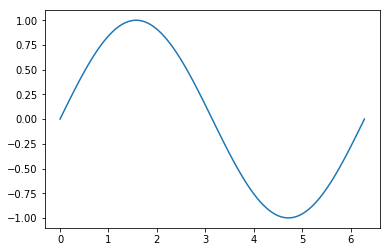

In [5]:
plt.plot(t,U[:,0])
plt.show()

Let's do $y'' + 2y' + 5y = 0$. Introduce variables $u_0 = y$ and $u_1 = y'$ and the system is $u_0' = u_1$ and $u_1' = y'' = -5y-2y' = -5u_0 - 2u_1$.

In [6]:
def f1(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = -5*u[0] - 2*u[1]
    return dudt

In [7]:
u0 = [0,1]
t = np.linspace(0,2*np.pi,100)
U = odeint(f1,u0,t)

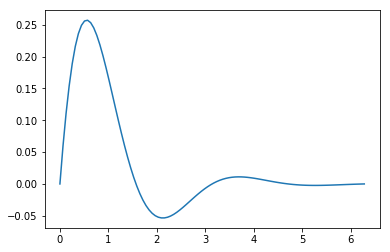

In [8]:
plt.plot(t,U[:,0])
plt.show()